In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
columns=["Population","Profit"]
city_data=pd.read_csv("D:/vscode/vscode_python/club_task/ex1data1.txt",names=columns)
city_data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
x_train=city_data.loc[:,"Population"]
y_train=city_data.loc[:,"Profit"]

In [4]:
len(x_train)

97

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


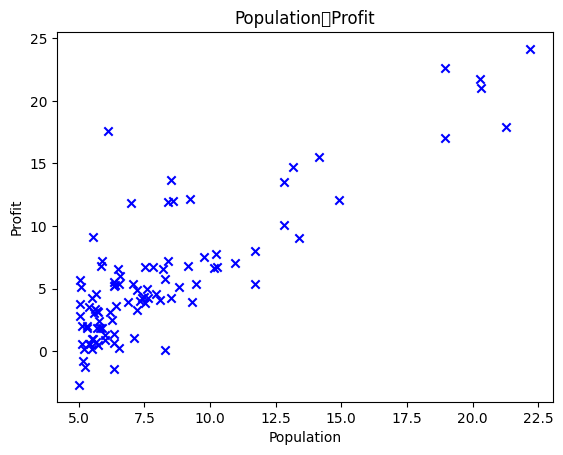

In [5]:
plt.scatter(x_train,y_train,marker="x",c="b")
plt.title("Population与Profit")
plt.xlabel("Population")
plt.ylabel("Profit")
plt.show()

# 定义线性回归

In [6]:
def compute_model_output(x,w,b):
    length=len(x)
    f_wb=np.zeros(length)
    
    for i in range(length):
        f_wb=w*x[i]+b
        
    return f_wb

# 定义损失函数

In [7]:
def compute_cost(x,y,w,b):
    m=len(x)
    f_wb=np.zeros(m)
    
    sum_J=0
    for i in range(m):
        f_wb=w*x[i]+b
        inner=(f_wb-y)**2
        sum_J+=inner
        cost=sum_J/(2*m)
        
    return cost

# 损失函数的偏导

In [8]:
def compute_gradient(x,y,w,b):
    m=len(x)
    f_wb=np.zeros(m)
    
    sum_w=0
    sum_b=0
    for i in range(m):
        f_wb=w*x[i]+b
        
        inner_w=(f_wb-y[i])*x[i]
        sum_w+=inner_w
        dj_dw=sum_w/m
        
        inner_b=f_wb-y[i]
        sum_b+=inner_b
        dj_db=sum_b/m
        
    return dj_dw,dj_db

# 梯度下降

In [25]:
def gradient_descent(x,y,w_init,b_init,alpha,num_iters,compute_cost,compute_gradient):
    J_history=[]#用于存储损失函数的历史值
    p_history=[]#用于存储w,b的值
    
    w=w_init
    b=b_init
    
    for i in range(num_iters):
        dj_dw,dj_db=compute_gradient(x,y,w,b)
        
        tem_w=w-alpha*dj_dw
        tem_b=b-alpha*dj_db
        w=tem_w
        b=tem_b
        
        #接下来打印梯度下降相关数据
        if i<=1000000:
            J_history.append(compute_cost(x,y,w,b))
            p_history.append([w,b])
            
        
                  
        return w,b,J_history,p_history

if i%math.ceil(num_iters/10) == 0:
            print(f"Iteration:{i:4},cost:{compute_cost(x,y,w,b):0.3e} " ,
                 f"dj_dw:{dj_dw:0.3e},dj_db:{dj_db:0.3e} ",
                  f"w:{w:0.3e},b:{b:0.3e}")

# 开始进行预测

In [70]:
w_init=1
b_init=0

alpha=1.0e-2 
num_iters=1000000

final_w,final_b,J_history,p_history=gradient_descent(x_train,y_train,w_init,b_init,alpha,num_iters,compute_cost,compute_gradient)

print(f"The final w is {final_w:.4e}.The final b is {final_b:.4e}")

The final w is 8.3925e-01.The final b is -2.3207e-02


# 最终表示结果：

In [71]:
print(f"h(x)={final_b:.4}+{final_w:.4}*x")

h(x)=-0.02321+0.8392*x


# 绘制回归线

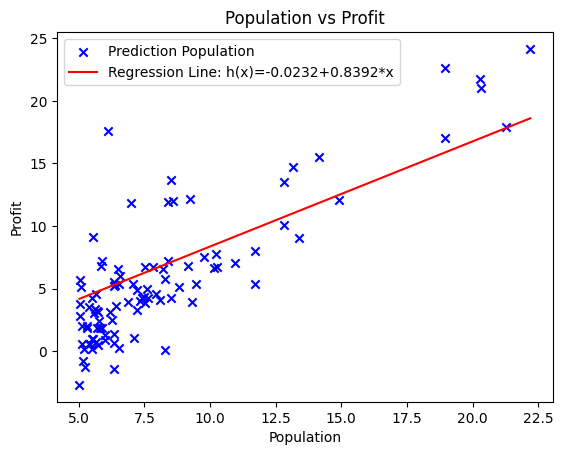

In [72]:
# 绘制散点图
plt.scatter(x_train, y_train, marker="x", c="b", label="Prediction Population")

# 绘制线性回归线
x_range = np.linspace(min(x_train), max(x_train), 100)
y_pred = final_b + final_w * x_range
plt.plot(x_range, y_pred, color="r", label=f"Regression Line: h(x)={final_b:.4f}+{final_w:.4f}*x")

# 设置标题和标签
plt.title("Population vs Profit")
plt.xlabel("Population")
plt.ylabel("Profit")

# 添加图例
plt.legend()

# 显示图形
plt.show()
